In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
#import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [56]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [57]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:

inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [71]:
rcalcs = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.date >= '2016-08-23').all()
dictt = []
ls = {}
ls["min"]=rcalcs[0][0]
ls["max"]= rcalcs[0][1]
ls["avg"]= rcalcs[0][2]
dictt.append(ls)

dictt
    

[{'min': 58.0, 'max': 87.0, 'avg': 74.59058295964125}]

In [11]:
last_date

('2017-08-23',)

<function matplotlib.pyplot.show(close=None, block=None)>

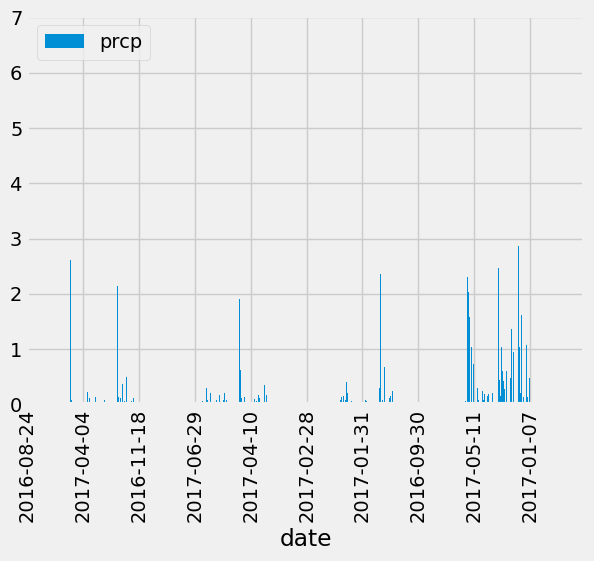

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
import datetime as dt

year_ago =dt.datetime(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

data = session.query(measurement.id,measurement.station,measurement.date,measurement.prcp,measurement.tobs).\
    filter(measurement.date > year_ago).all()

ptp_rows = [{ "date": result[2],"prcp":result[3]} for result in data]
ptp_rows



# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(ptp_rows).set_index("date")

# Sort the dataframe by date
df.sort_values(by=['date'], ascending=False)


# Use Pandas Plotting with Matplotlib to plot the data

df.plot.bar()
plt.locator_params(axis='x', nbins=10)
plt.show


In [29]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number stations in the dataset
total_count = session.query(measurement).distinct().count()
print(total_count)

19550


In [41]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
#stationCount = session.query(func.count(measurement.station),measurement.station)
stationCount = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
stationCount

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [47]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostActive = stationCount[0][0]
mostActive

mn = session.query(func.min(measurement.tobs)).filter(measurement.station == mostActive).all() 
mx = session.query(func.max(measurement.tobs)).filter(measurement.station == mostActive).all() 
av = session.query(func.avg(measurement.tobs)).filter(measurement.station == mostActive).all() 

print(mn, mx, av)              
                   
                 




[(54.0,)] [(85.0,)] [(71.66378066378067,)]


<function matplotlib.pyplot.show(close=None, block=None)>

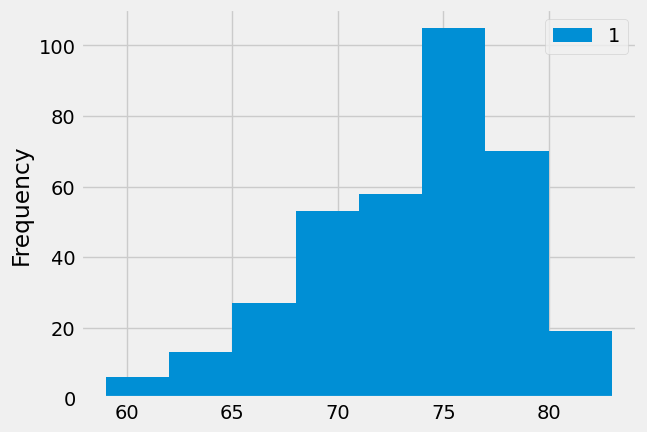

In [49]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last12months = session.query(measurement.station, measurement.tobs).filter(measurement.station == mostActive).filter(measurement.date >= year_ago).all()
df_2 = pd.DataFrame(last12months)



df_2.plot.hist(by='station', bins=8)
plt.show


# Close session

In [50]:
# Close Session
session.close()